# 14-day cumulative number of COVID-19 cases per 100 000

At the end of the page, we provide a detailed description of how the numbers are calculated.

### Compute data

In [1]:
import datetime as dt
import pandas as pd
pd.set_option("max_rows", None)
from oscovida import get_incidence_rates_countries

## Table for all countries

In [2]:
cases_incidence, deaths_incidence = get_incidence_rates_countries()

Downloaded data: last data point 8/31/21 from https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
Downloaded data: last data point 8/31/21 from https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv


In [3]:
cases_incidence

,14-day-sum,population,14-day-incidence-rate
Country,,,
Afghanistan,977,38928341,2.5
Albania,9789,2877800,340.2
Algeria,7417,43851043,16.9
Andorra,73,77265,94.5
Angola,2572,32866268,7.8
Antigua and Barbuda,318,97928,324.7
Argentina,89177,45195777,197.3
Armenia,6964,2963234,235.0
Australia,14319,25459700,56.2


## Table sorted by 14-day-incidence

In [4]:
cases_incidence.sort_values(by=['14-day-incidence-rate'], ascending=False)

,14-day-sum,population,14-day-incidence-rate
Country,,,
Summer Olympics 2020,230,0,inf
Georgia,59349,3989175,1487.8
Kosovo,26234,1810366,1449.1
Montenegro,8344,628062,1328.5
Israel,110042,8655541,1271.3
Seychelles,1081,98340,1099.2
Cuba,116246,11326616,1026.3
Dominica,685,71991,951.5
Saint Lucia,1744,183629,949.7


## Tutorial: Detailed calculation for one country

In [5]:
from oscovida import fetch_cases, get_population
import datetime

In [6]:
period = 14 # Days we compute the incidence rate over

In [7]:
cases = fetch_cases() # Get a DataFrame where each row is the country, and columns cumulative case numbers
cases = cases.groupby(cases.index).sum() # Merge the rows for different regions as we want the numbers for an entire country

In [8]:
cases_germany = cases.loc['Germany'][2:] # First 2 entries are lat/lon so we only take the subsequent ones
cases_germany.tail()

8/27/21    3925190.0
8/28/21    3933585.0
8/29/21    3940212.0
8/30/21    3947035.0
8/31/21    3965681.0
Name: Germany, dtype: float64

In [9]:
yesterday = datetime.datetime.now() - datetime.timedelta(days=1)
x_days_ago = yesterday - datetime.timedelta(days=period)

In [10]:
period_mask = (
    (yesterday > pd.to_datetime(cases_germany.index)) &
    (pd.to_datetime(cases_germany.index) > x_days_ago)
) # Mask for dates between today and x days ago

In [11]:
cases_in_period_per_day_germany = cases_germany[period_mask].diff() # Apply the period mask and get the diff to get the daily new cases
cases_in_period_per_day_germany

8/18/21        NaN
8/19/21     8303.0
8/20/21     8966.0
8/21/21     6600.0
8/22/21     5946.0
8/23/21     5592.0
8/24/21    16654.0
8/25/21    13275.0
8/26/21    11688.0
8/27/21     1940.0
8/28/21     8395.0
8/29/21     6627.0
8/30/21     6823.0
8/31/21    18646.0
Name: Germany, dtype: float64

<AxesSubplot:>

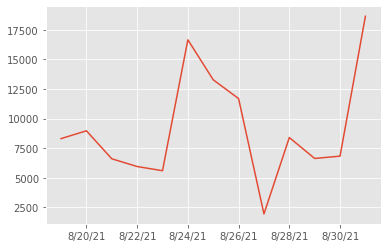

In [12]:
cases_in_period_per_day_germany.plot() # We can easily look at new cases per day

In [13]:
population = get_population().population

In [14]:
population_germany = population.loc['Germany'] # Get the population of Germany
population_germany

83783945.0

In [15]:
incidence_rate_germany = cases_in_period_per_day_germany.sum() / population_germany * 100_000
incidence_rate_germany # By convention this is total cases over period / population * 100_000

142.5750482386572